In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [2]:
# Importing the dataset
dataset = pd.read_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSfinal.csv', sep=',')

In [3]:
data_new_20features_X = dataset[['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std']]


In [4]:
dataset_y = dataset['Label']

Label Encoding for the Dataset

In [5]:
dataset.drop('Label', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_y_trans = le.fit_transform(dataset_y)
data_y_trans

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Train Test Split 20 Features Dataset

In [6]:
from sklearn.model_selection import train_test_split
X_train_20features, X_test_20features, y_train_20features, y_test_20features = train_test_split( data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

Standardization of the 20 Feature Dataset

In [7]:
from sklearn.preprocessing import StandardScaler
ss20 = StandardScaler()
X_train_20features_std = ss20.fit_transform(X_train_20features)
X_test_20features_std = ss20.fit_transform(X_test_20features)

Test Accuracy: 0.999711591836624


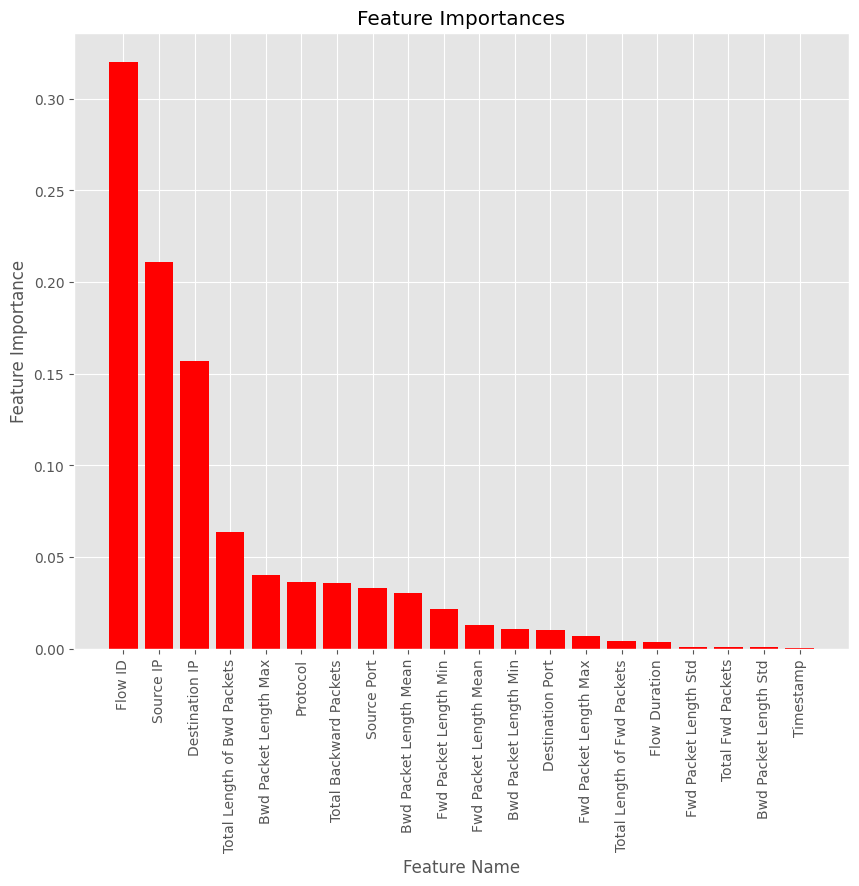

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def create_random_forest_model():
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    return model

# Create the Random Forest model
model = create_random_forest_model()

# Train the model
model.fit(X_train_20features_std, y_train_20features)

# Evaluate the model
y_pred = model.predict(X_test_20features_std)
accuracy = accuracy_score(y_test_20features, y_pred)
print(f'Test Accuracy: {accuracy}')

# Plot feature importances
importances = model.feature_importances_
feature_names = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std']

sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), importances[sorted_indices],
        color="r", align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.show()

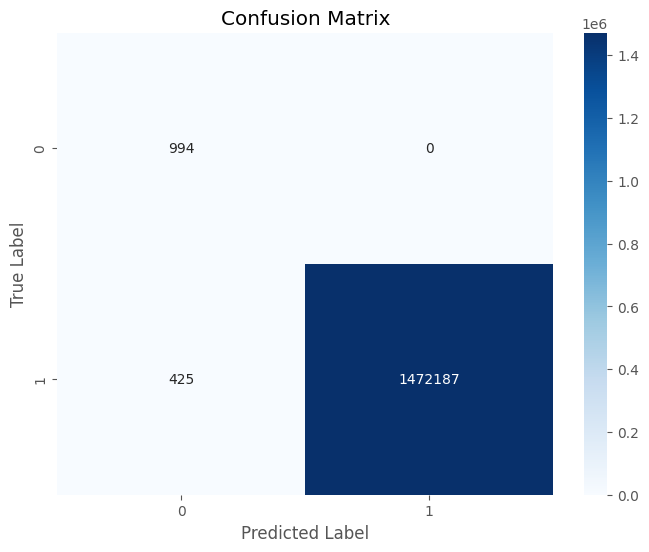

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_20features, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test_20features, y_pred)
recall = recall_score(y_test_20features, y_pred)
f1 = f1_score(y_test_20features, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 1.0
Recall: 0.9997113971636792
F1 Score: 0.9998556777559351


In [11]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test_20features, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.70      1.00      0.82       994
           1       1.00      1.00      1.00   1472612

    accuracy                           1.00   1473606
   macro avg       0.85      1.00      0.91   1473606
weighted avg       1.00      1.00      1.00   1473606



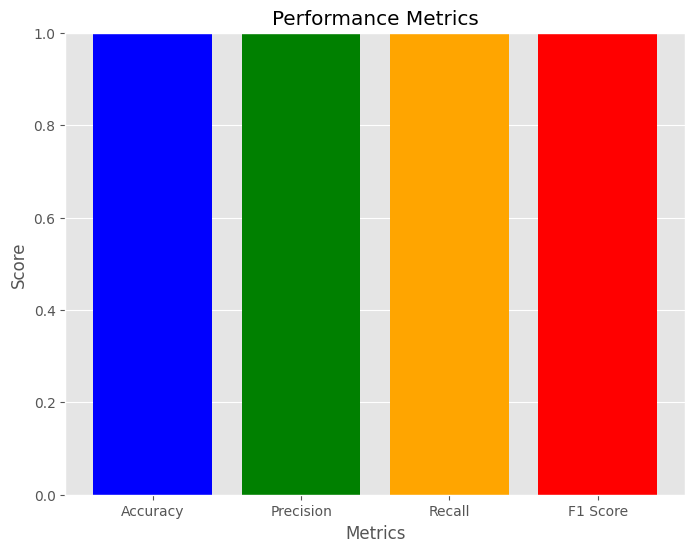

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test_20features, y_pred)
recall = recall_score(y_test_20features, y_pred)
f1 = f1_score(y_test_20features, y_pred)
accuracy = accuracy_score(y_test_20features, y_pred)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1
plt.show()
